In [36]:
import re
import matplotlib.pyplot as plt
import numpy as np
from skimage import measure
import re
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.cm import viridis
import numpy.ma as ma

from matplotlib.animation import FuncAnimation#for animation
BAD_VALUE = -999

#### Function To Load Data

In [37]:
def generate_dataset(name):
    
    with open("./datasets/" + name) as f:
      lines = f.readlines()[7:]

    rain_array = []
    
    for line in lines:

        split_line = re.split(r'[\t\n]',line.strip())[1:]
        
        if ("** line too long **" in split_line[-1]):
            split_line.pop()
        
        split_line = list(map(lambda x : float(x) , split_line))
        
        while (len(split_line) < 1440):
            split_line.append(BAD_VALUE)
        
        rain_array.append(split_line)

    return np.array(rain_array)

### Function to plot Contour Map

In [44]:
def plot_contour(data,title, contour_levels, contour_colors):
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)}, figsize=(12, 8))

    plt.style.use('dark_background')#black background
    
    # Create contour plot with given contour values and colors
    contour_plot = ax.contour(data, contour_levels, origin='lower', colors=contour_colors, linewidths=0.7, extent=(-180, 180, -90, 90), transform=ccrs.PlateCarree(central_longitude=180))

    ax.add_feature(cfeature.COASTLINE, edgecolor='white')  # Set white outline for coastline

    # Set labels and title
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(title)
    
    ax.set_extent([60,100,-10, 30], ccrs.PlateCarree())

    # Add color bar
    colorbar = fig.colorbar(contour_plot, ax=ax,ticks=contour_levels, orientation='vertical',label='Rain Amount',extend='both')
    # Display the contour map
    plt.show()

### Generating Data for 10 different days

In [39]:
files = ["1Apr2016.txt","10Apr2016.txt","20Apr2016.txt","30Apr2016.txt","10May2016.txt","20May2016.txt","30May2016.txt", "10Jun2016.txt","20Jun2016.txt","30Jun2016.txt"]
titles = ["Sea Surface Rain on 1 April 2016","Sea Surface Rain on 10 April 2016","Sea Surface Rain on 20 April 2016","Sea Surface Rain on 30 April 2016","Sea Surface Rain on 10 May 2016","Sea Surface Rain on 20 May 2016","Sea Surface Rain on 30 May 2016","Sea Surface Rain on 10 June 2016","Sea Surface Rain on 20 June 2016","Sea Surface Rain on 30 June 2016"]
data = []
for i in range(len(files)):
    data_i = generate_dataset(files[i])
    data_i = ma.masked_where(data_i == BAD_VALUE, data_i)
    data.append(data_i)

### Data Analysis

In [40]:
for i in range(len(data)):
    count_greater_than_0_5 = np.sum(data[i] > 0.5)
    # Calculate the percentage
    percentage_greater_than_0_5 = (count_greater_than_0_5 / data[i].size) * 100
    print(f'{titles[i]}:')
    print(f"Percentage of values greater than 0.5: {percentage_greater_than_0_5}%")
    print(f"Max value in dataset: {data[i].max()} and Min value in dataset: {data[i].min()}\n")

Sea Surface Rain on 1 April 2016:
Percentage of values greater than 0.5: 2.9574652777777777%
Max value in dataset: 25.0 and Min value in dataset: 0.0

Sea Surface Rain on 10 April 2016:
Percentage of values greater than 0.5: 2.802083333333333%
Max value in dataset: 16.78 and Min value in dataset: 0.0

Sea Surface Rain on 20 April 2016:
Percentage of values greater than 0.5: 2.826678240740741%
Max value in dataset: 25.0 and Min value in dataset: 0.0

Sea Surface Rain on 30 April 2016:
Percentage of values greater than 0.5: 3.193094135802469%
Max value in dataset: 25.0 and Min value in dataset: 0.0

Sea Surface Rain on 10 May 2016:
Percentage of values greater than 0.5: 3.458043981481482%
Max value in dataset: 25.0 and Min value in dataset: 0.0

Sea Surface Rain on 20 May 2016:
Percentage of values greater than 0.5: 3.3055555555555554%
Max value in dataset: 25.0 and Min value in dataset: 0.0

Sea Surface Rain on 30 May 2016:
Percentage of values greater than 0.5: 2.963445216049383%
Max v

### Experimenting Contour Plot on global extent

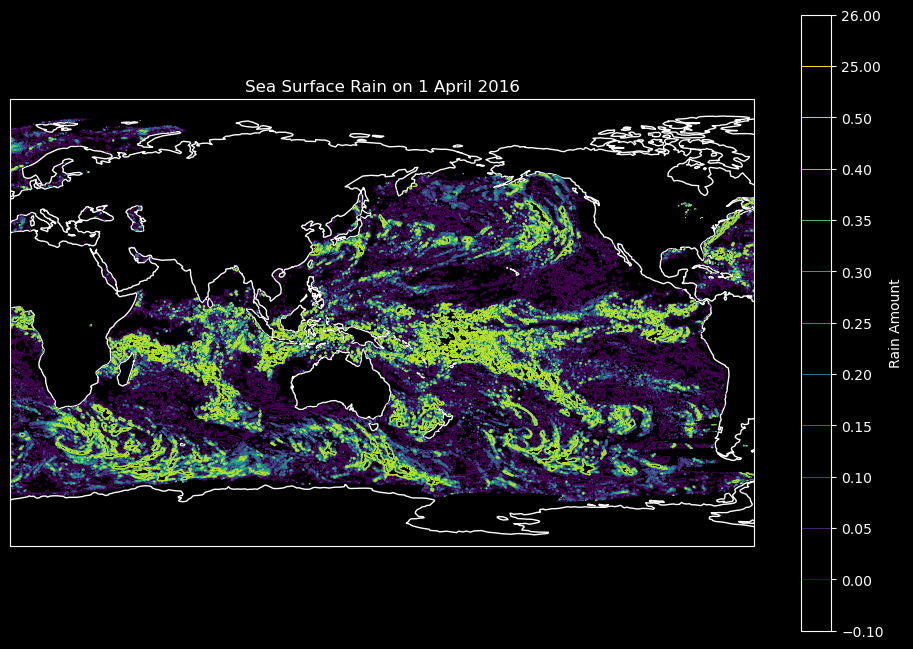

In [48]:
def plot_contour_globe(data,title, contour_levels, contour_colors):
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)}, figsize=(12, 8))

    plt.style.use('dark_background')#black background
    
    # Create contour plot with given contour values and colors
    contour_plot = ax.contour(data, contour_levels, origin='lower', colors=contour_colors, linewidths=0.7, extent=(-180, 180, -90, 90), transform=ccrs.PlateCarree(central_longitude=180))

    ax.add_feature(cfeature.COASTLINE, edgecolor='white')  # Set white outline for coastline

    # Set labels and title
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(title)
    
    ax.set_extent([0,300,-90, 90], ccrs.PlateCarree())

    # Add color bar
    colorbar = fig.colorbar(contour_plot, ax=ax,ticks=contour_levels, orientation='vertical',label='Rain Amount',extend='both')
    
    plt.savefig('contour_plot(world).png')
    # Display the contour map
    plt.show()

plot_contour_globe(data[0],titles[0],[-0.1,0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.5,25,26],['#FFFFFF','#fde725', '#bddf26', '#7ad151', '#44bf70', '#22a884',
          '#21918c', '#2a788e', '#355f8d', '#414487', '#482475',
          '#440154','#FFFFFF'][::-1])


### Plotting Contour Maps for different days

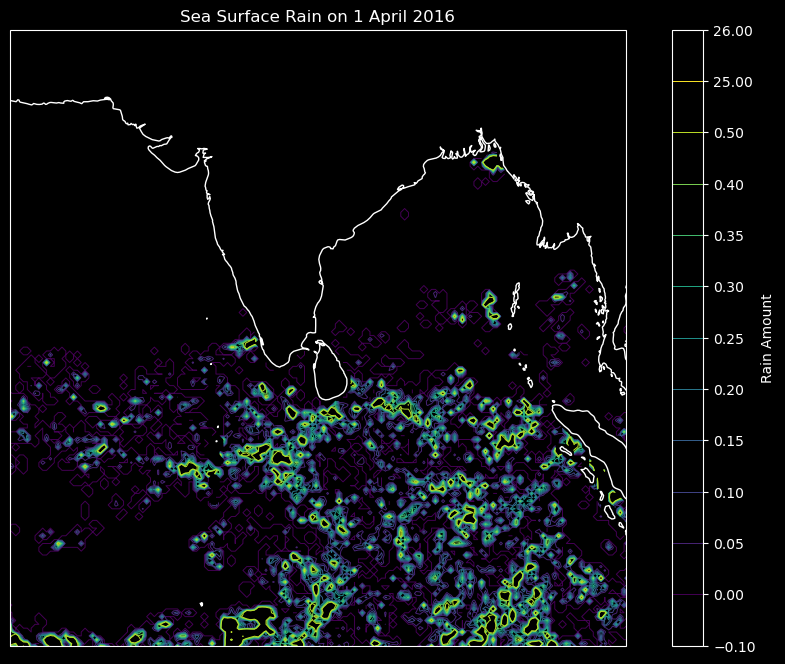

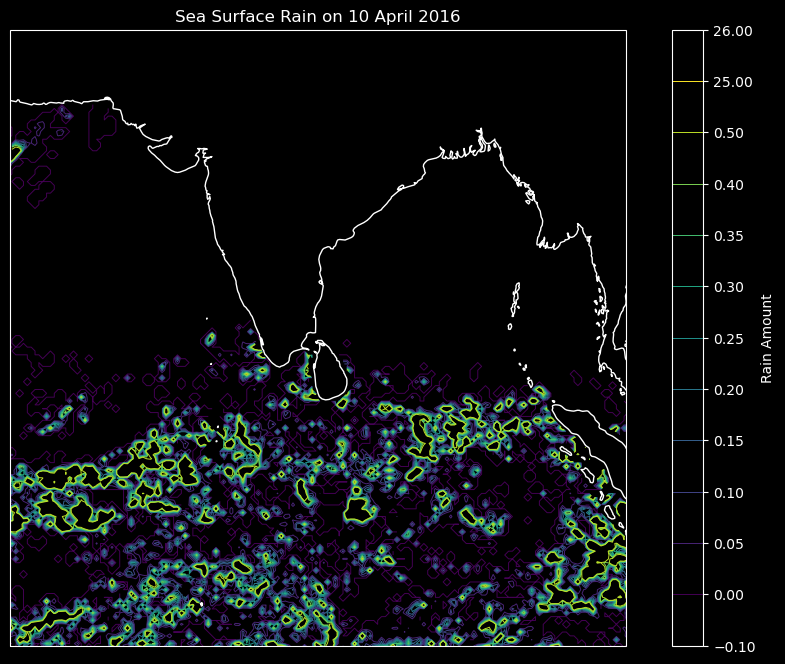

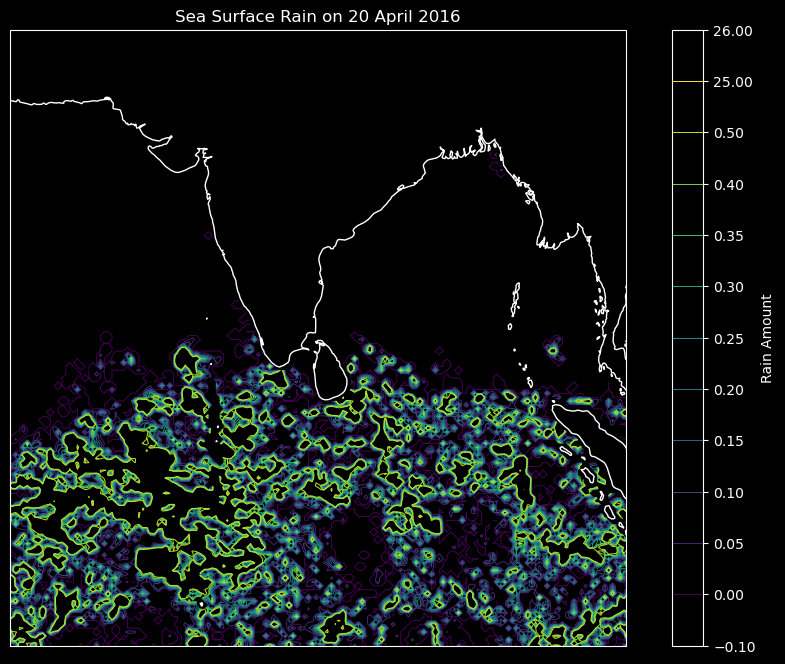

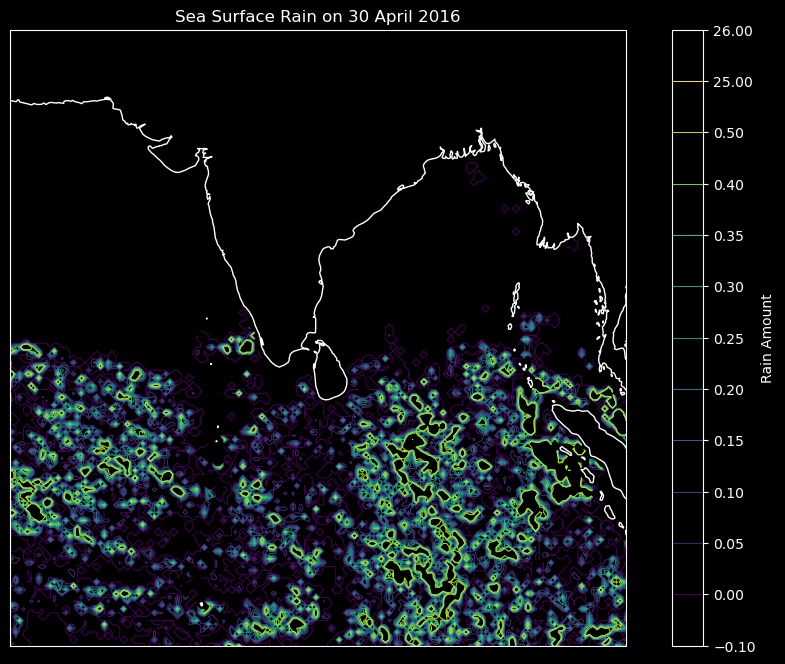

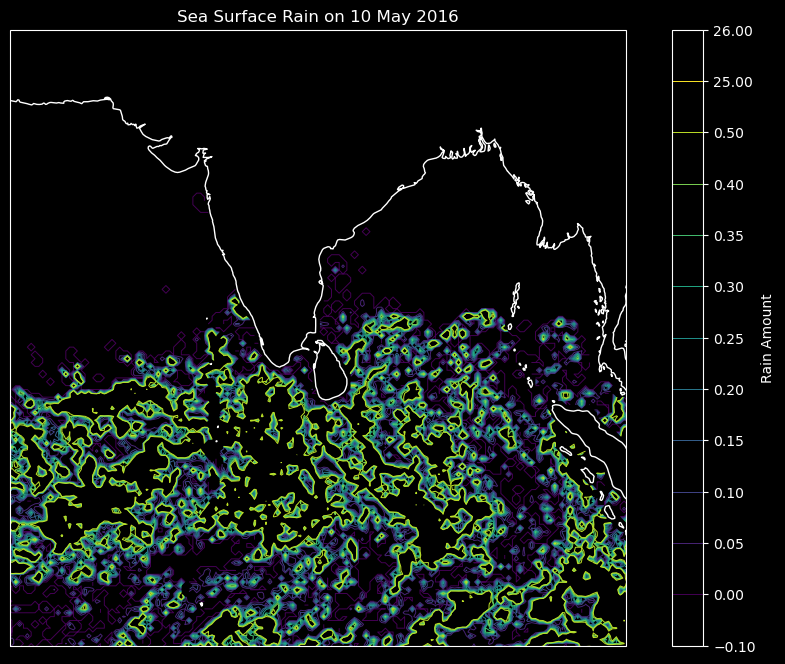

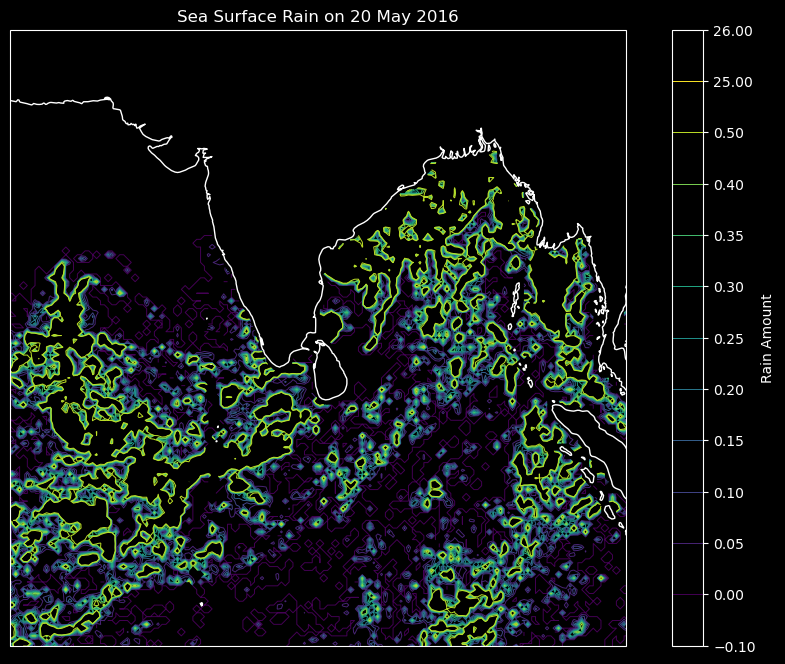

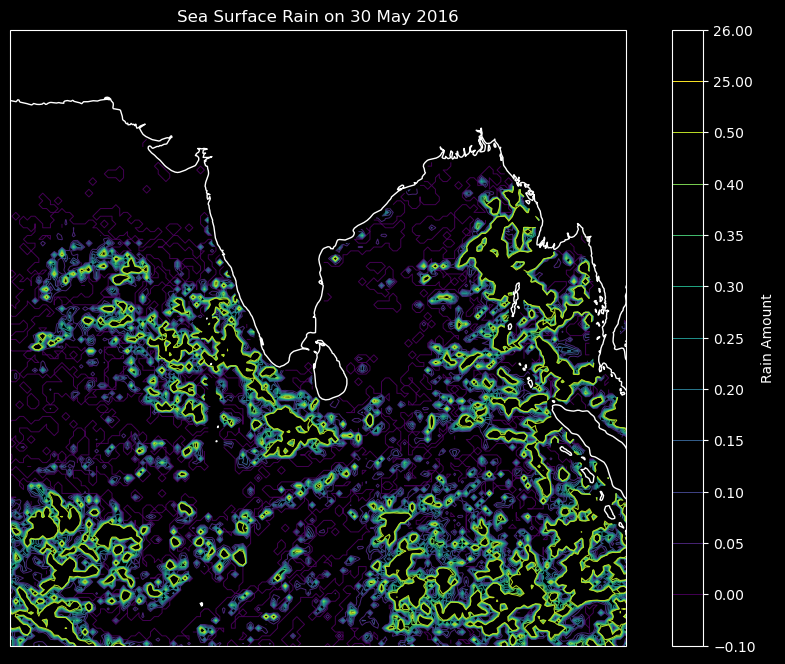

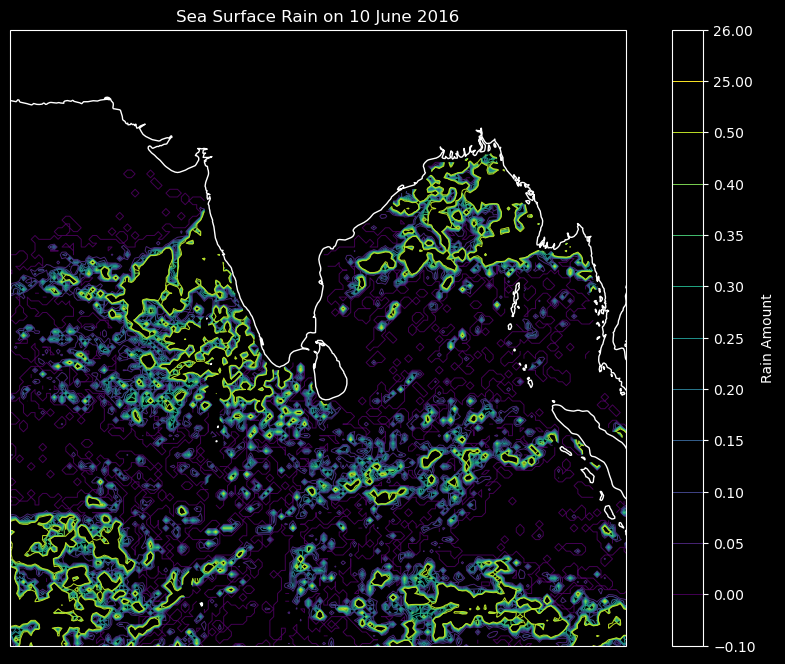

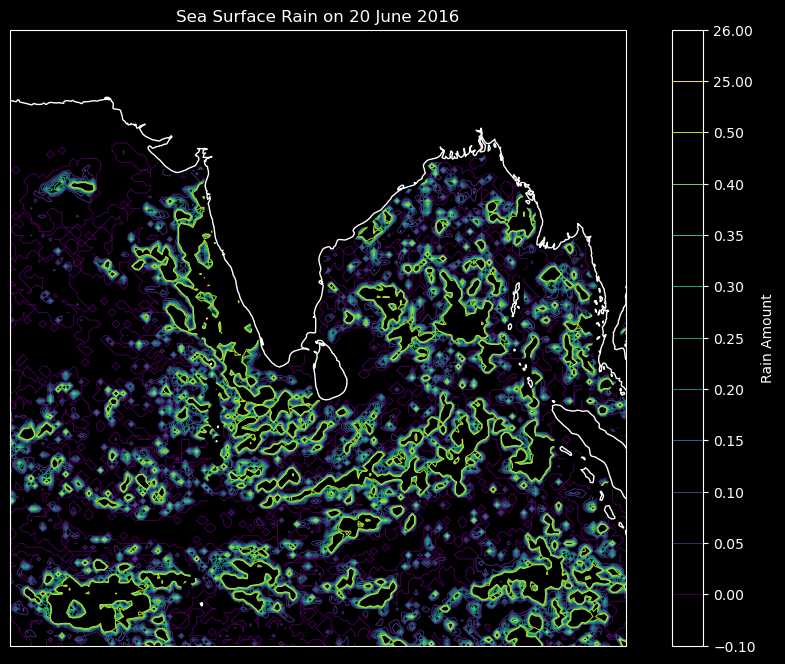

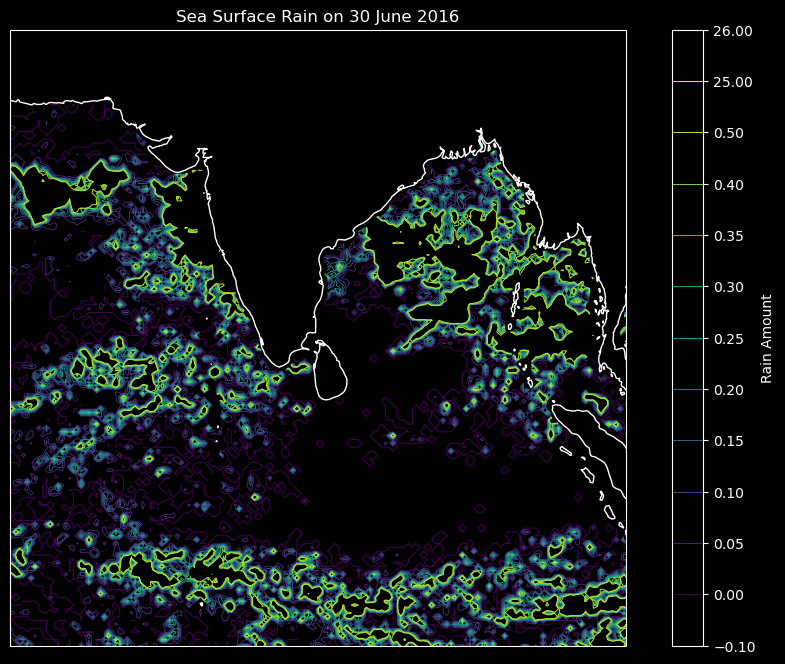

In [49]:
contour_levels = [-0.1,0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.5,25,26]
colors = ['#FFFFFF','#fde725', '#bddf26', '#7ad151', '#44bf70', '#22a884',
          '#21918c', '#2a788e', '#355f8d', '#414487', '#482475',
          '#440154','#FFFFFF'][::-1]
for i in range(len(data)):
    plot_contour(data[i], titles[i],contour_levels,colors)

### Generating the Animation of Contour Plots

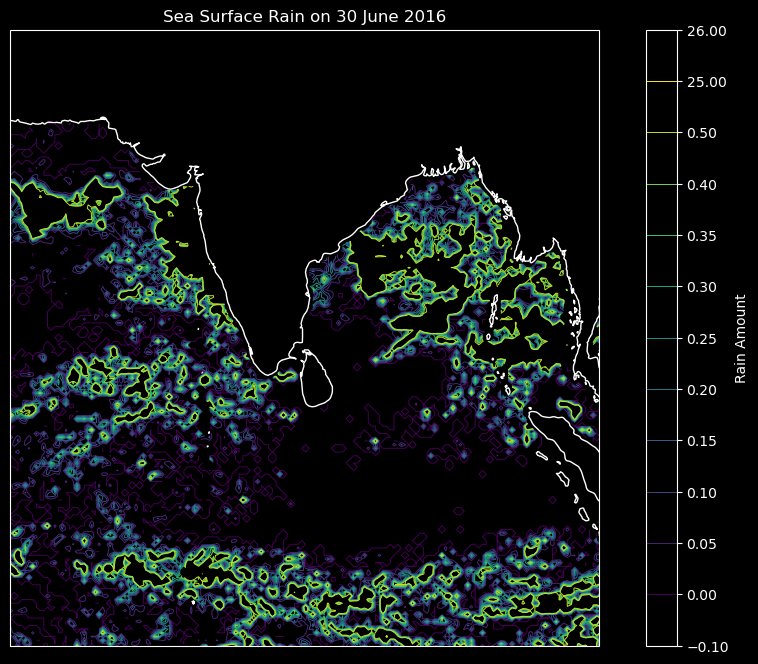

In [43]:
def create_contour_animation(data_list, contour_levels, contour_colors, titles,output_file):
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)}, figsize=(12, 8))
    plt.style.use('dark_background')  # Black background
    ax.add_feature(cfeature.COASTLINE, edgecolor='white')  # Set white outline for coastline
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_extent([60,100,-10,30])
    cax = ax.contour(np.zeros_like(data_list[0]), contour_levels, colors=contour_colors, linewidths=0.7, extent=(-180, 180, -90, 90), transform=ccrs.PlateCarree(central_longitude=180))
    colorbar = fig.colorbar(cax, ax=ax,ticks=contour_levels, orientation='vertical',label='Rain Amount',extend='both')


    def update(frame):
        ax.clear()  # Clear the previous plot
        ax.add_feature(cfeature.COASTLINE, edgecolor='white')  # Set white outline for coastline
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        data = data_list[frame]  # Get data for the current frame
        title = titles[frame]  # Title for the current frame
        cax = ax.contour(data, contour_levels, colors=contour_colors, linewidths=0.7, extent=(-180, 180, -90, 90), transform=ccrs.PlateCarree(central_longitude=180))
    
        ax.set_title(title)
        ax.set_extent([60,100,-10,30])

    # Create the animation
    animation = FuncAnimation(fig, update, frames=len(data_list), repeat=False)

    # Save the animation as a video file
    animation.save(output_file, writer='ffmpeg', fps=0.75)

create_contour_animation(data, contour_levels,colors,titles,'contour_map_animation.mp4')
